In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly as plty

import matplotlib.mlab as mlabQ
import seaborn as sns

from copy import copy as copy
from pprint import pprint

import sys
import os


import personal_plotter as p_plt

plty.tools.set_credentials_file(username="jahirmedinacs", api_key="hE0JRAHgYucTVR4f3M7g")

In [2]:
# ### Online lab

# import tensorflow as tf
# tf.__version__

# Data Visualization
_ _ _
___
_ _ _


## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [28]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [4]:
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis
___

> *NOTE*  We are gonna use all the columns , still, the Hypothesis are the same
___

#### 1.2.2.- Pre - Analizing Data

In [5]:
case_data_Boston = boston_dataset.iloc[:, :].copy()
case_data_Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.3 Data Exploration

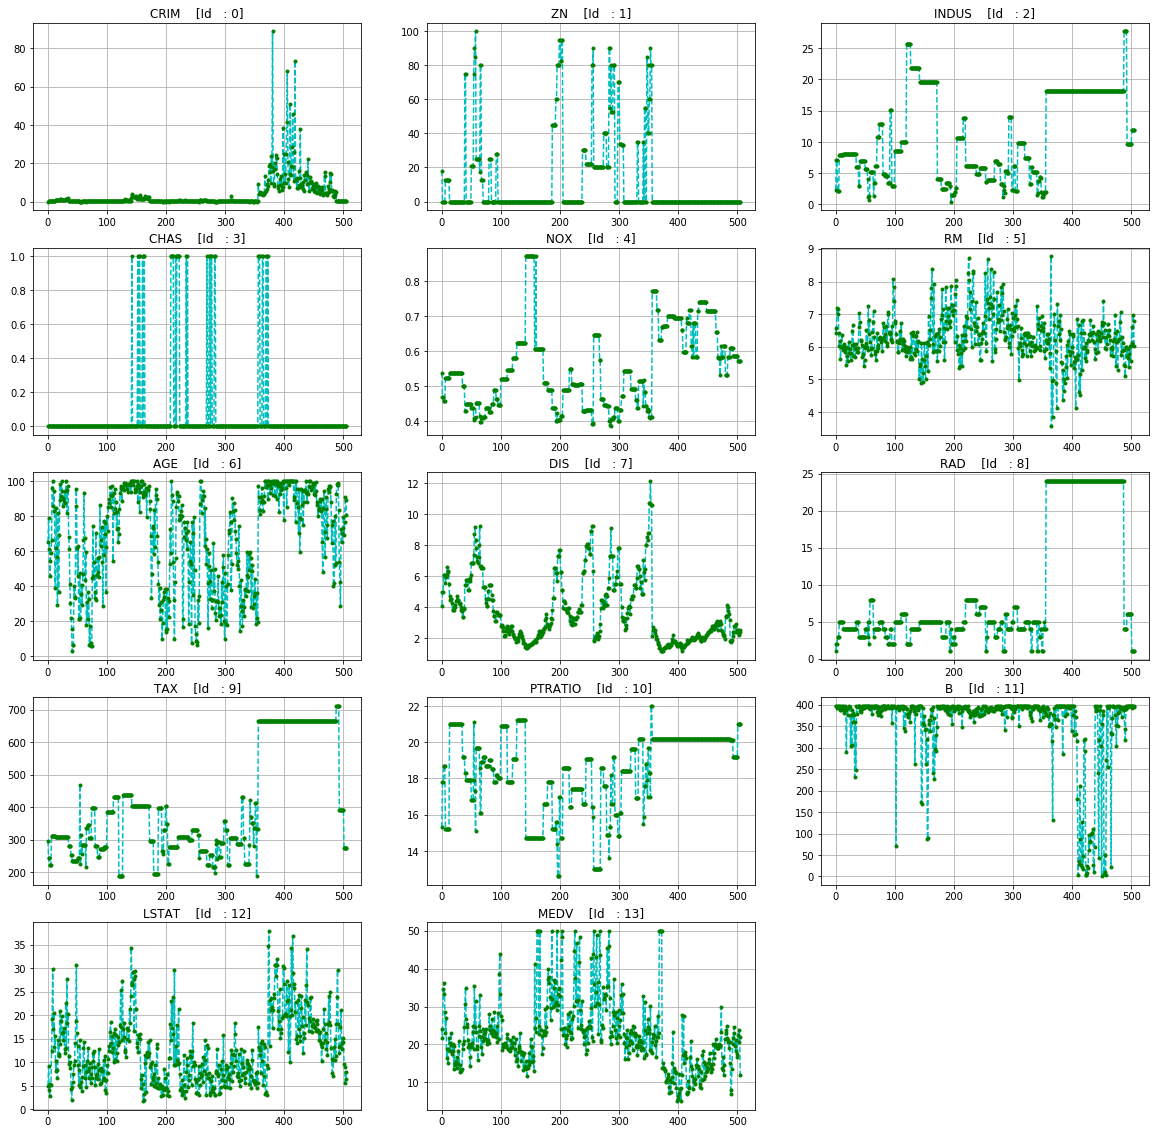

In [6]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(20,20),
                        grid_subplot=[5,3],
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

##### 1.2.2.1.- Small Values

In [7]:
sampling_span = case_data_Boston.max() - case_data_Boston.min() <= 1
case_data_Boston[sampling_span[sampling_span == True].index.tolist()].describe()

,CHAS,NOX
count,506.000000,506.000000
mean,0.069170,0.554695
std,0.253994,0.115878
min,0.000000,0.385000
25%,0.000000,0.449000
50%,0.000000,0.538000
75%,0.000000,0.624000
max,1.000000,0.871000


1. *CHAS* is a dummy variable (0 or 1)
2. *NOX* is a representation in Parts per 10 Million (1e7)

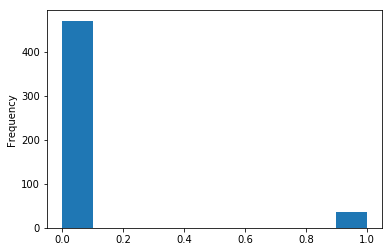


    Amount of 1 :>>	35
    ratio :>>	0.0049
    % :>>	0.4941
    % (-human) :>>	0.5
    


In [8]:
case_data_Boston.CHAS.plot.hist()
plt.show()

print(
    """
    Amount of 1 :>>\t{:d}
    ratio :>>\t{:.4f}
    % :>>\t{:.4f}
    % (-human) :>>\t{:.1f}
    """.format(
        (case_data_Boston.CHAS == 1).astype(int).sum(),
        (case_data_Boston.CHAS == 1).astype(int).sum() / (case_data_Boston.size * 1.0),
        ((case_data_Boston.CHAS == 1).astype(int).sum() * 100.0) / case_data_Boston.size,
        ((case_data_Boston.CHAS == 1).astype(int).sum() * 100.0) / case_data_Boston.size
        )
    )

In [9]:
a_des = case_data_Boston.describe()
b_des = case_data_Boston[case_data_Boston.CHAS != 1].describe()

var = (a_des - b_des).abs()
print(var)
var_a = (var/ a_des) * 100.0
var_b = (var/ b_des) * 100.0
print(var_a, "\n\n", var_b)
print((var_a - var_b).abs())

            CRIM         ZN      INDUS       CHAS        NOX         RM  \
count  35.000000  35.000000  35.000000  35.000000  35.000000  35.000000   
mean    0.130923   0.271183   0.117585   0.069170   0.002878   0.017460   
std     0.275273   0.295526   0.053498   0.253994   0.002775   0.016722   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.002405   0.000000   0.150000   0.000000   0.001000   0.003500   
50%     0.011290   0.000000   1.130000   0.000000   0.000000   0.006500   
75%     0.017948   0.000000   0.000000   0.000000   0.000000   0.029500   
max     0.000000   0.000000   0.000000   1.000000   0.000000   0.055000   

             AGE        DIS        RAD        TAX    PTRATIO          B  \
count  35.000000  35.000000  35.000000  35.000000  35.000000  35.000000   
mean    0.663224   0.056872   0.017472   1.633334   0.071643   1.212991   
std     0.310063   0.039857   0.041193   0.316674   0.008988   2.128678   
min     0.000000   0.007

##### 1.2.2.1.- Normalize

In [10]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min()) / (case_data_Boston.max() - case_data_Boston.min())

not_norm_case_data_Boston = case_data_Boston.copy()

case_data_Boston = case_data_Boston_norm

##### 1.2.2.2.- Creating Targets

In [11]:
# not normalized

temp_targets = p_plt.make_targets(not_norm_case_data_Boston.MEDV, samples=3)
not_norm_case_data_Boston["target"] = temp_targets

# normalized
temp_targets = p_plt.make_targets(case_data_Boston.MEDV, samples=3, labels=["Low Cost", "Normal Cost", "High Cost"])
# temp_targets = p_plt.make_targets(case_data_Boston.MEDV, samples=3)

case_data_Boston["target"] = temp_targets

## 2.- Data Balance

### 2.1 Seaking Variables Aviable for Discretization

In [12]:
columns = case_data_Boston.columns
columns = columns[columns != "MEDV"]

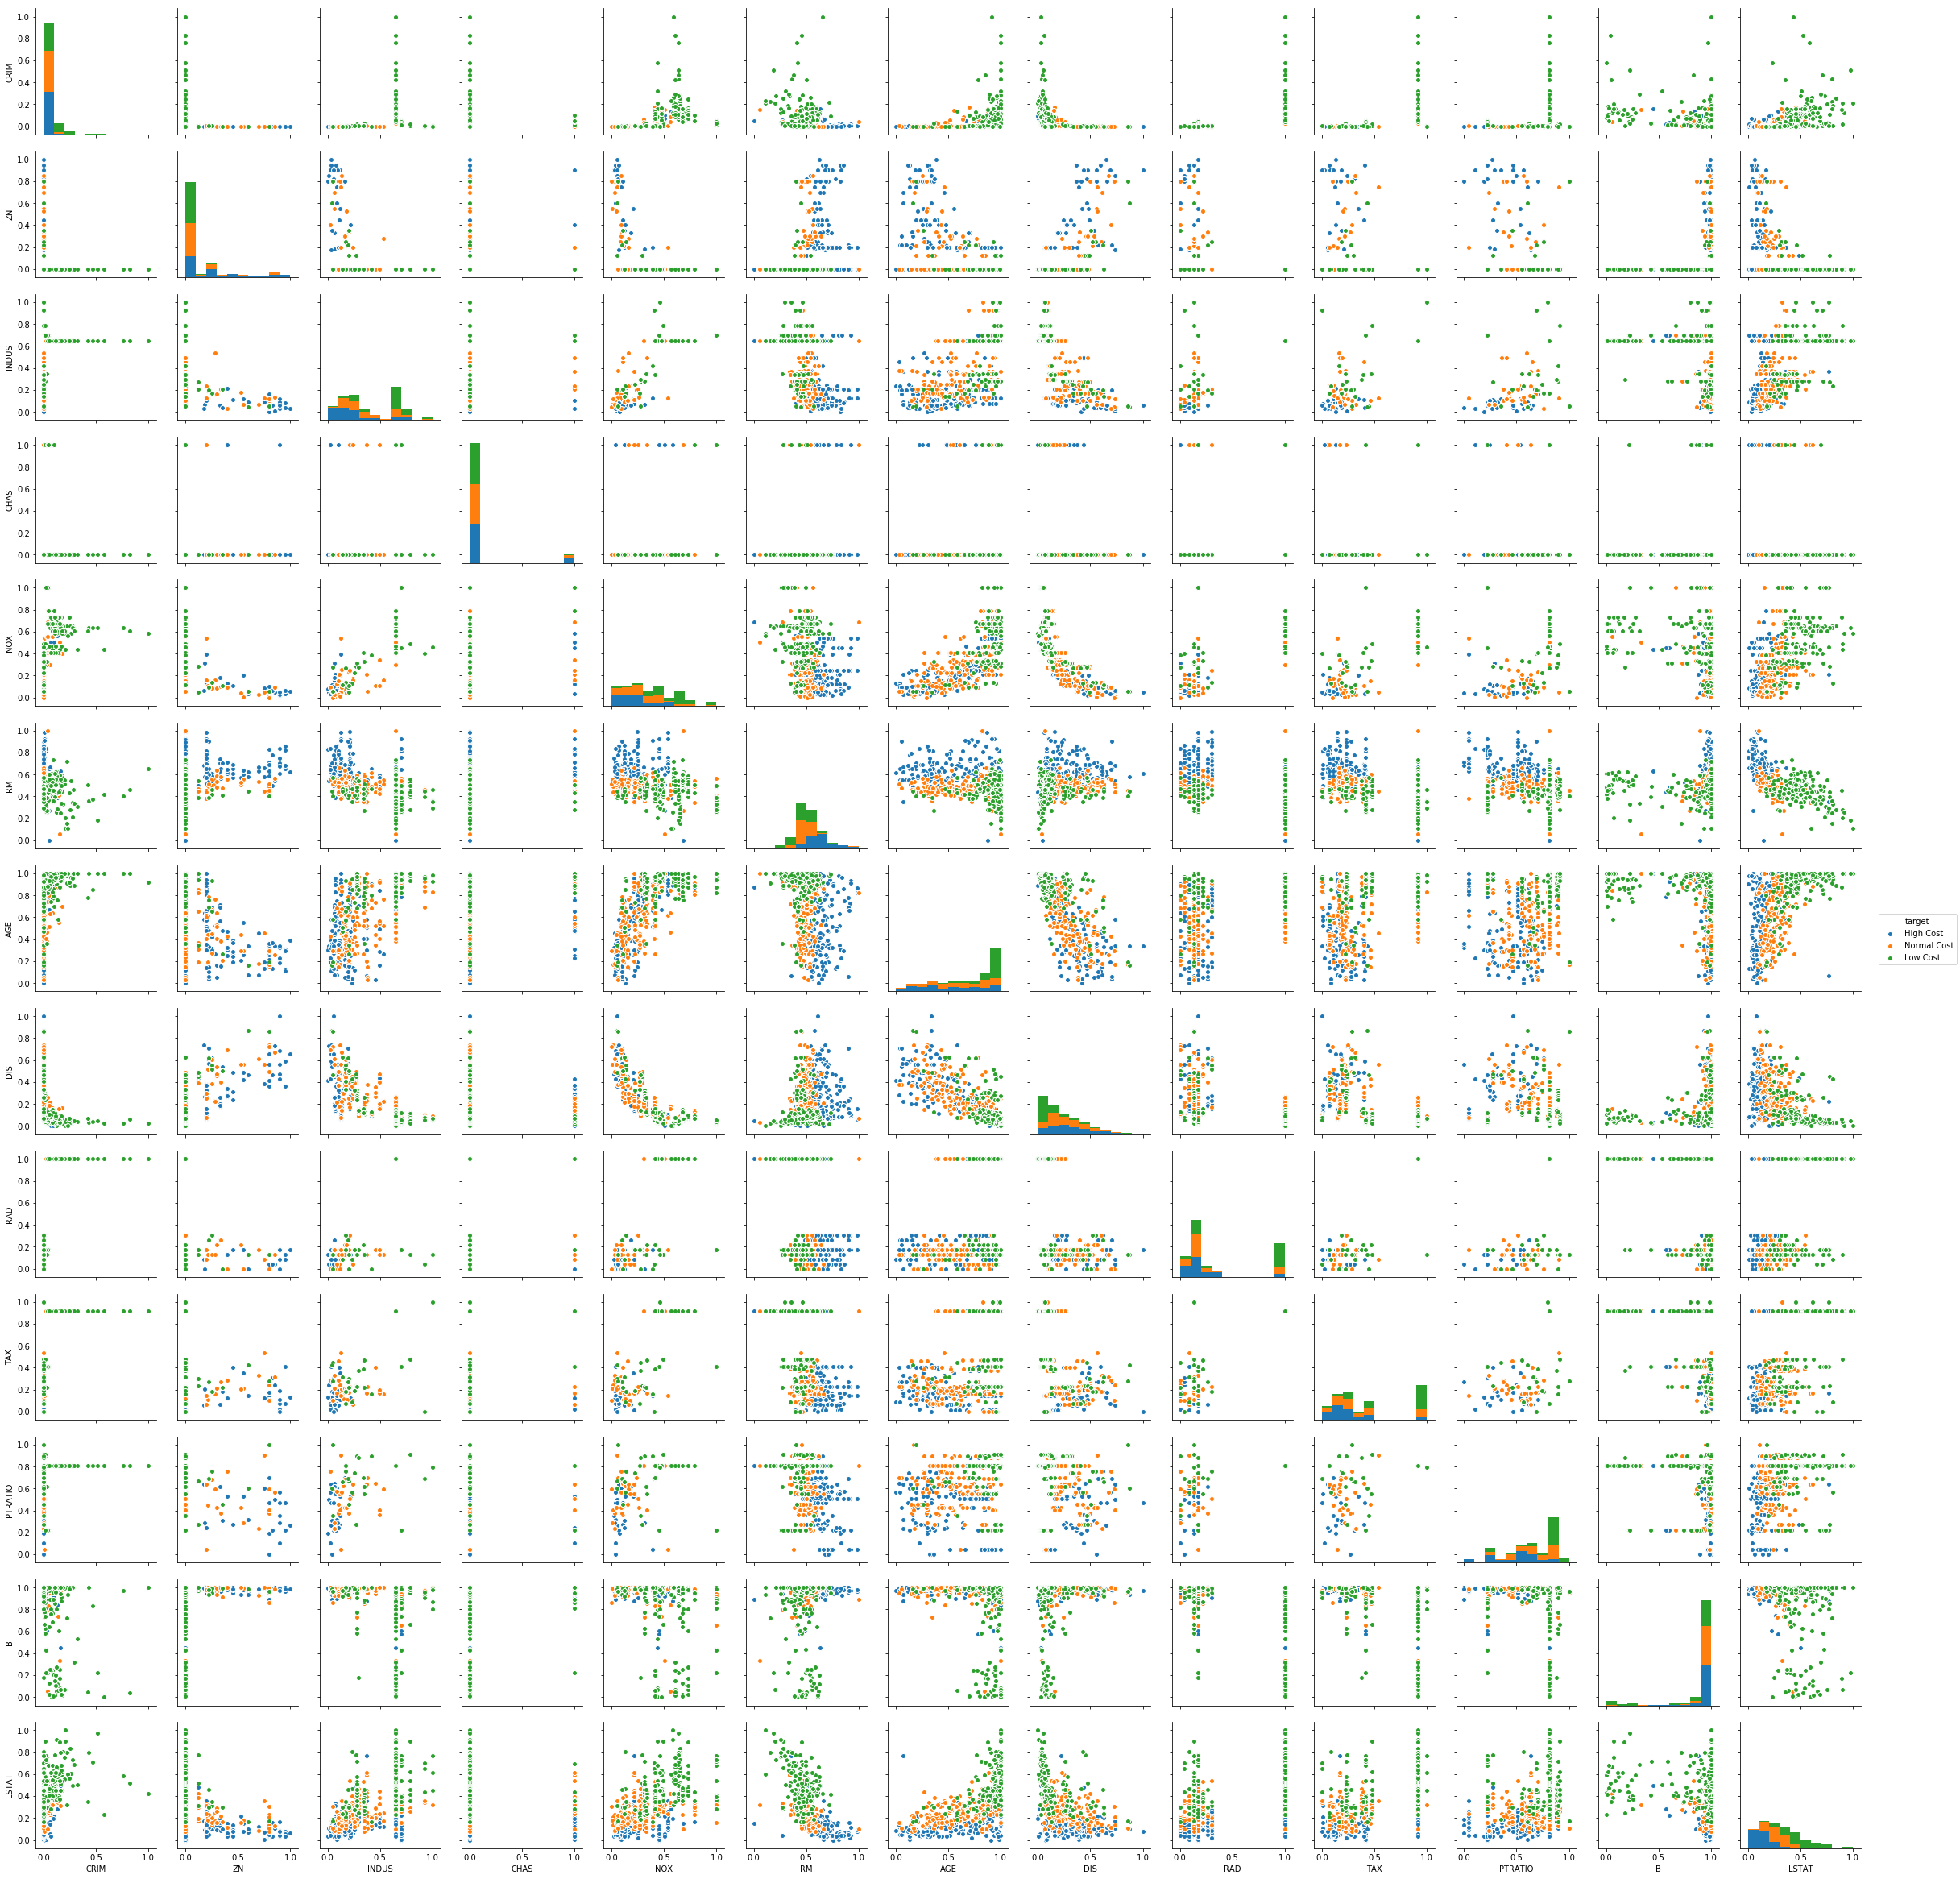

In [13]:
sns.pairplot(data=case_data_Boston, vars=columns[:-1], hue='target')
plt.show()

#### 1.3.1 Histogram

***Below : 1rst Not Normalize Data, 2nd Normalize Data (normal base)***

##### PLOT

In [14]:
target_names = case_data_Boston['target'].unique()
columns = case_data_Boston.columns.tolist()

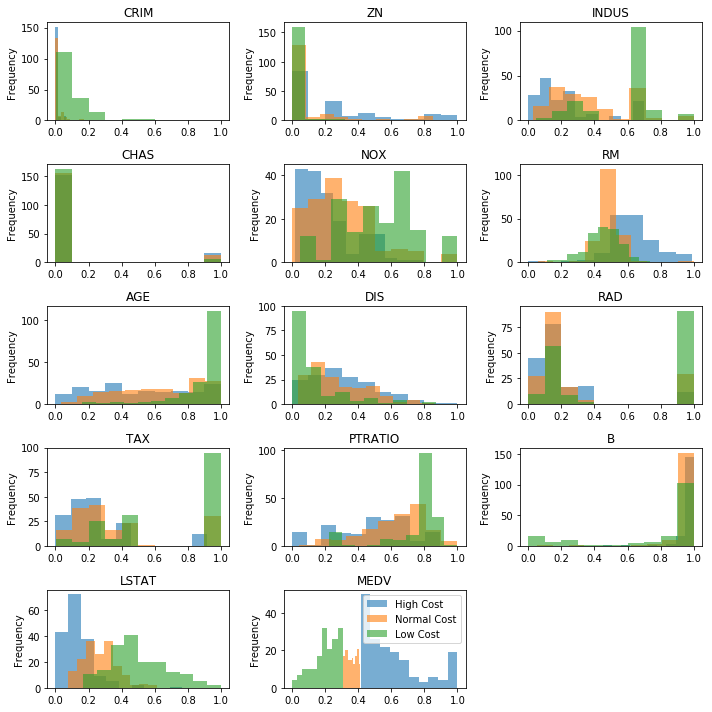

In [18]:
p_plt.multy_hist(case_data_Boston, columns, target_names, grid_subplot=[5,3],alpha_value=0.6).show()

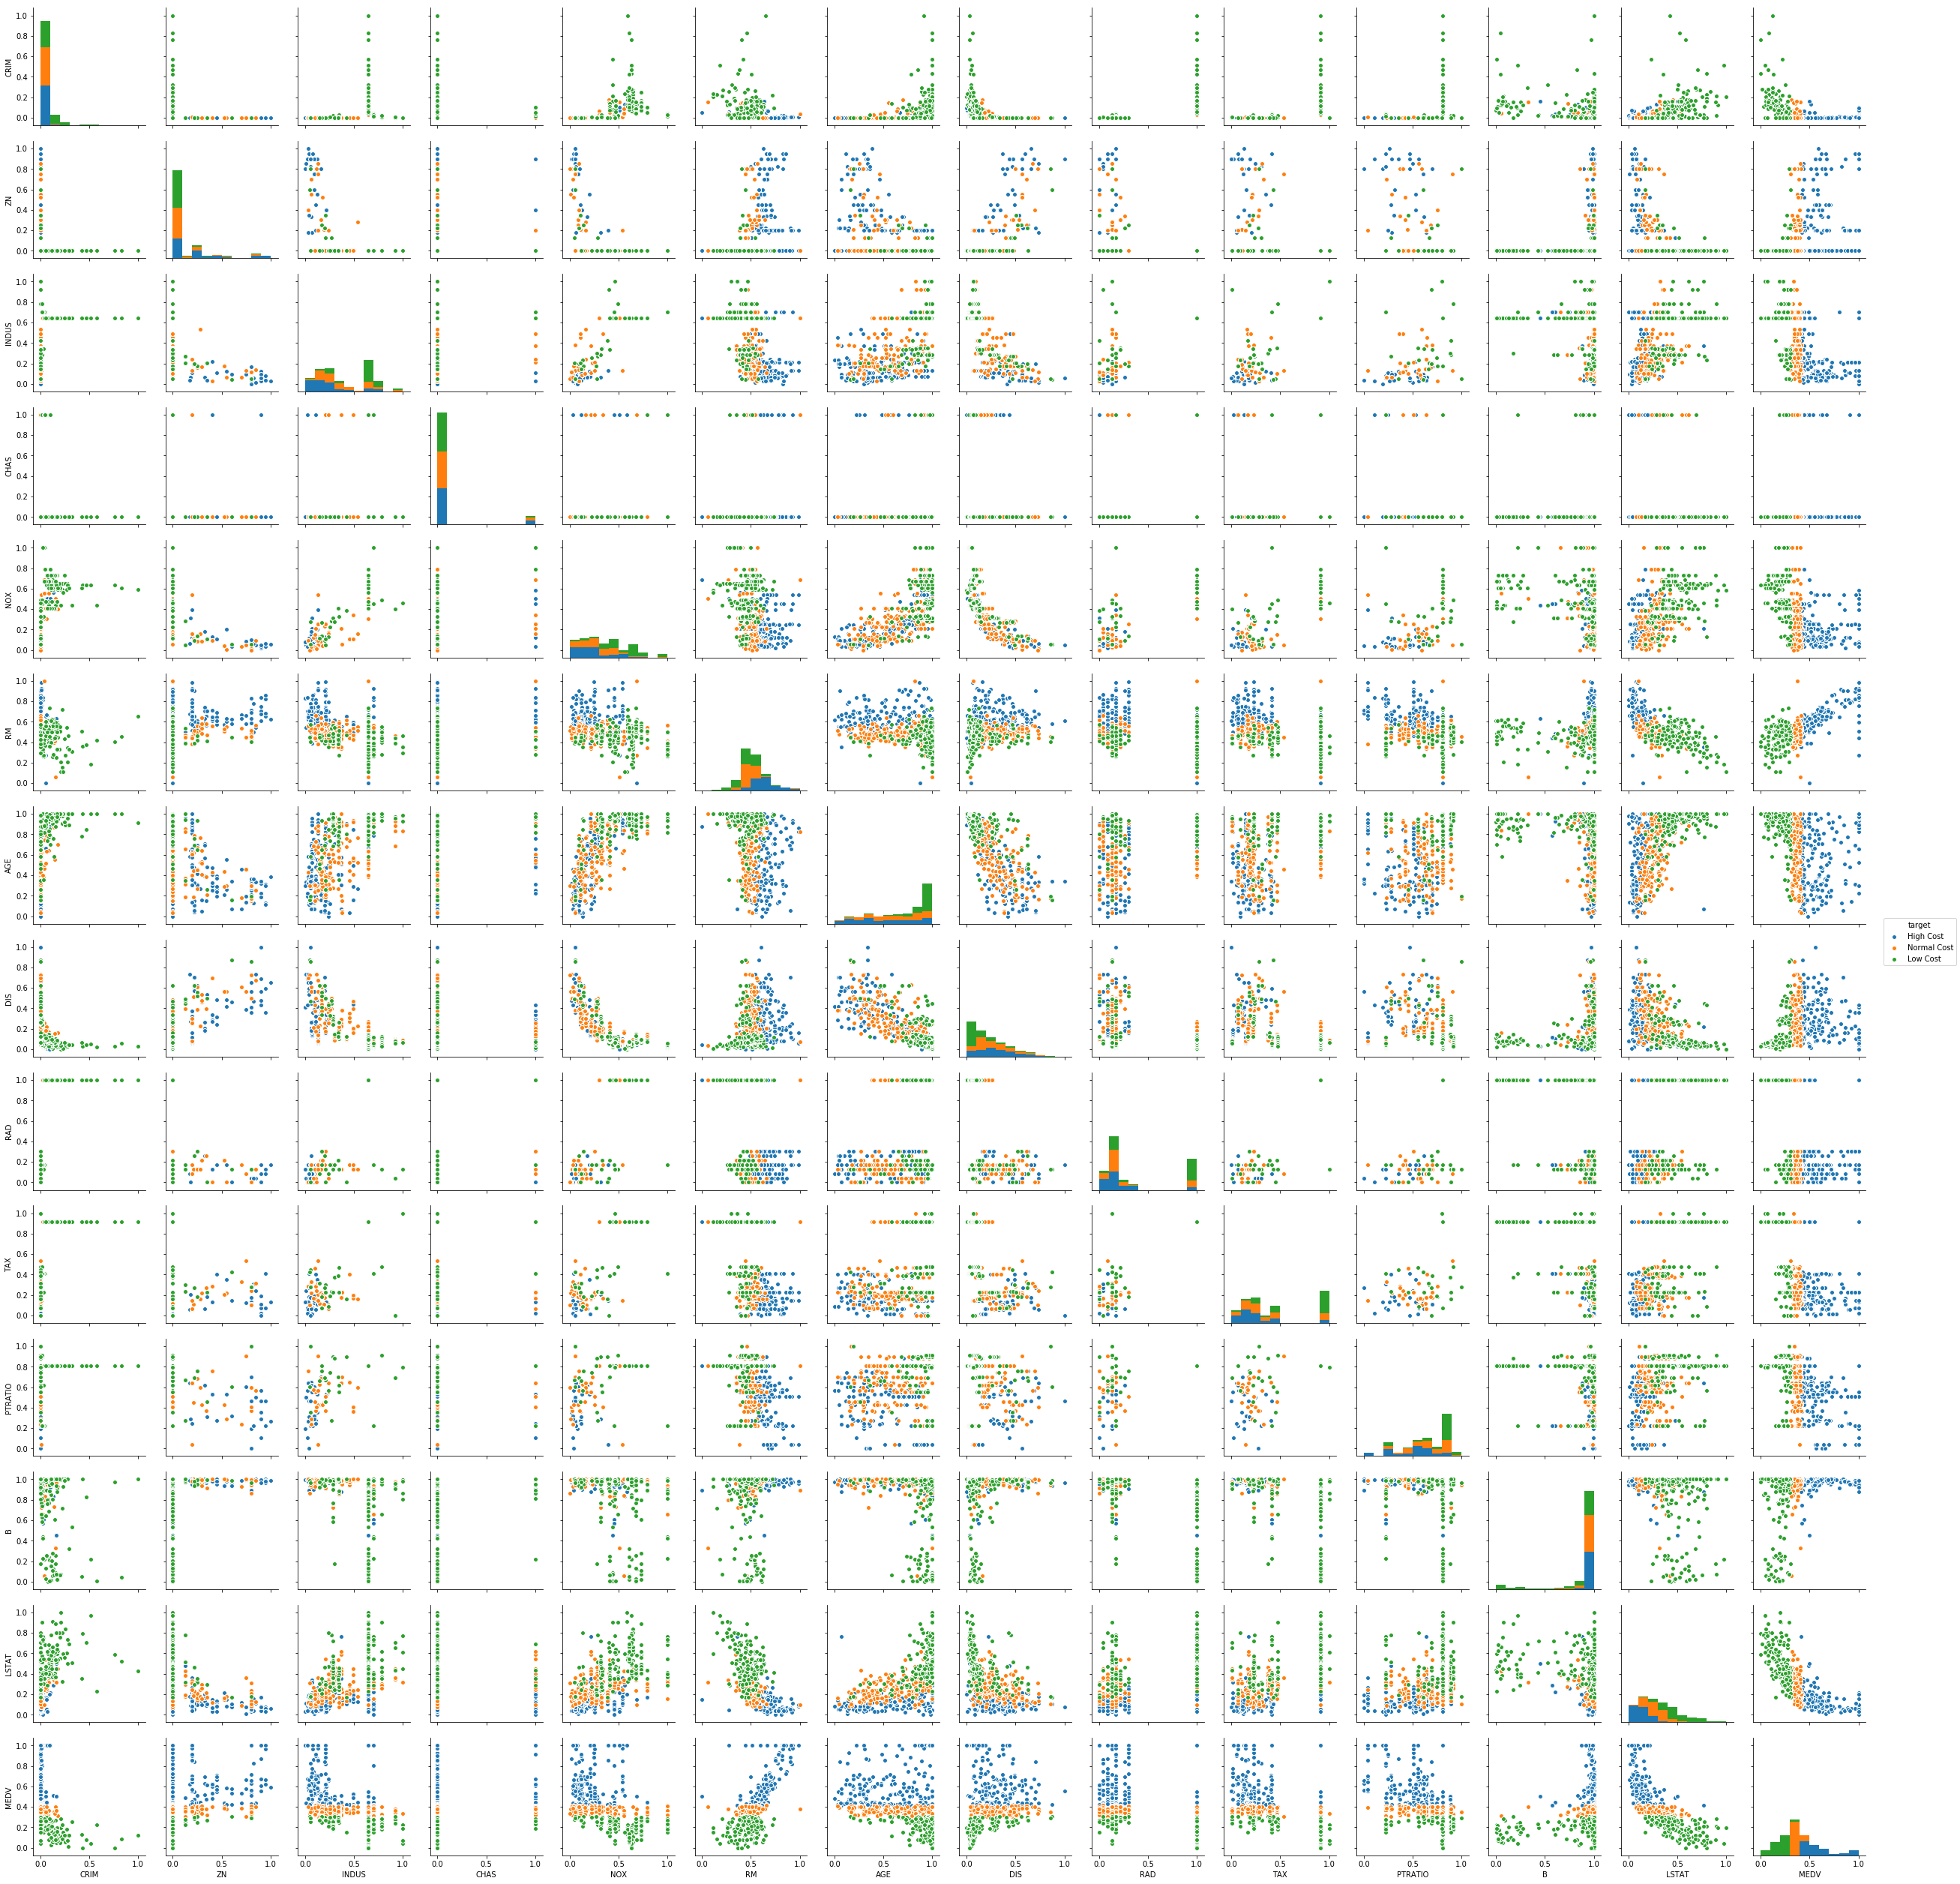

In [19]:
sns.pairplot(data=case_data_Boston, vars=columns[:-1], hue='target')
plt.show()

In [20]:
stats = not_norm_case_data_Boston.describe()
print(stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

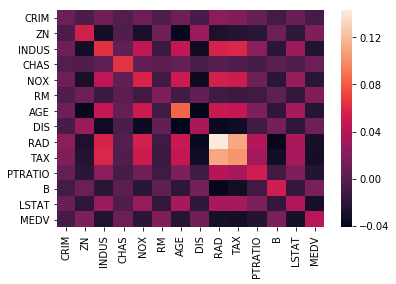

In [21]:
p_plt.heat_plot(case_data_Boston.iloc[:, :-1], pd.DataFrame.cov).show()

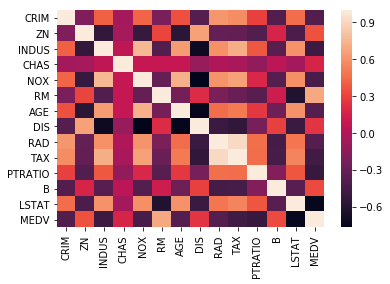

In [22]:
p_plt.heat_plot(case_data_Boston.iloc[:, :-1], pd.DataFrame.corr).show()

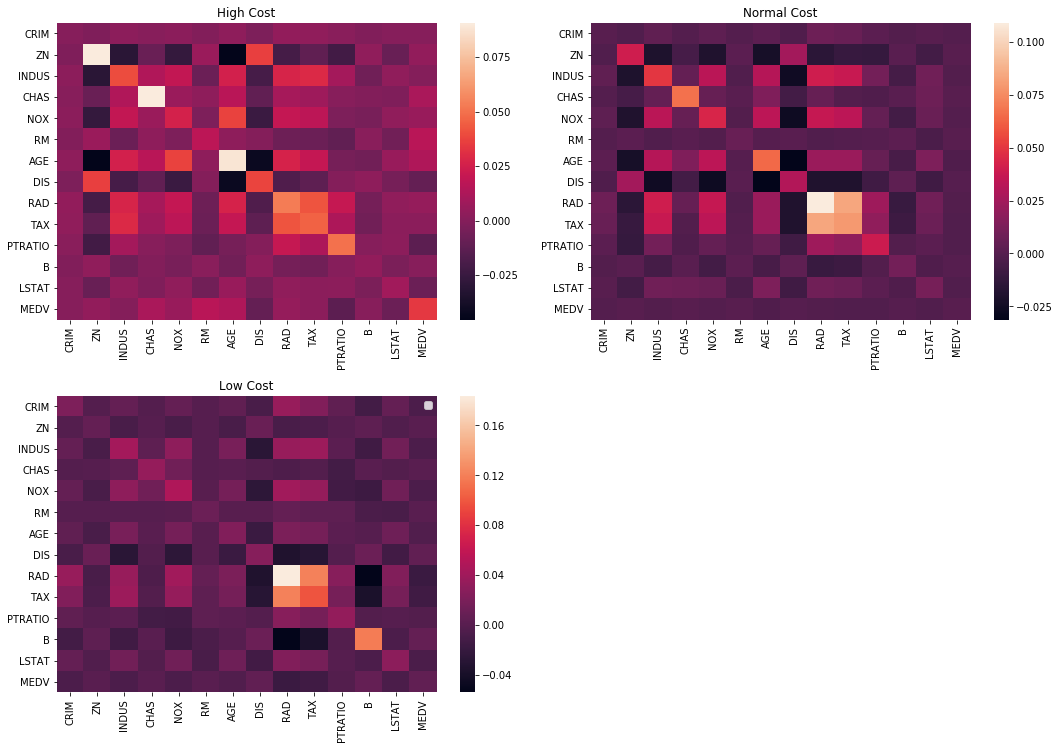

In [23]:
p_plt.multy_heat(case_data_Boston, columns, target_names, pd.DataFrame.cov).show()

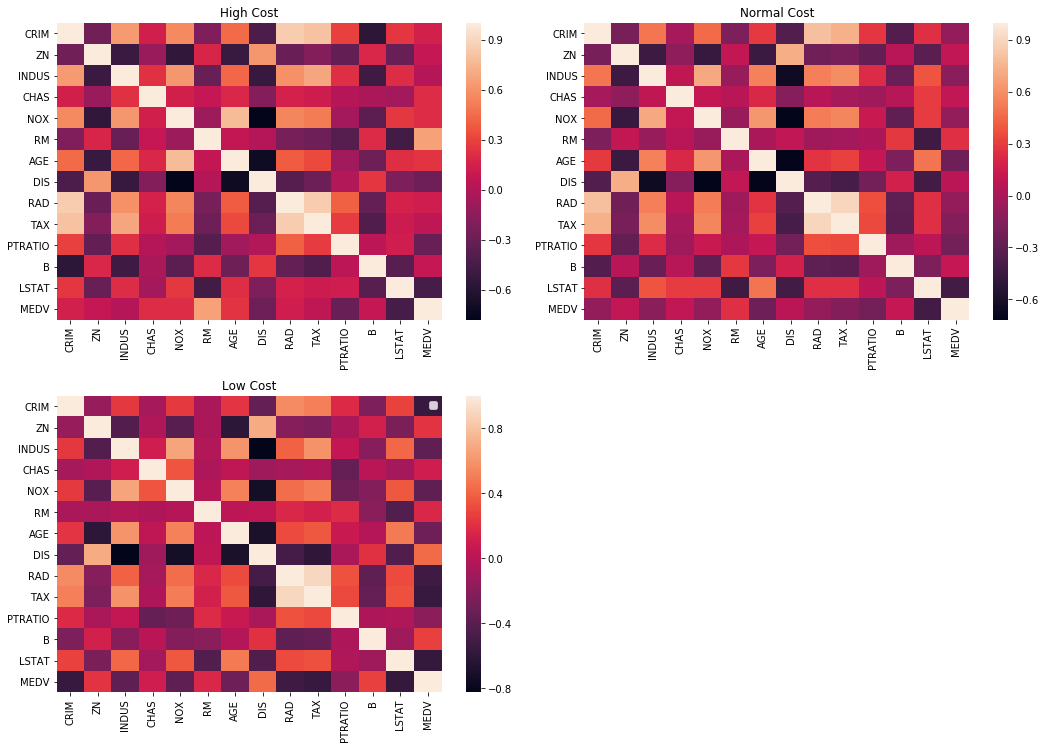

In [24]:
p_plt.multy_heat(case_data_Boston, columns, target_names, pd.DataFrame.corr).show()

### 1.4 Hypothesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?

Using the parameters ***Available & Rooms*** as variables in the formula:

$$ Available = av \land Rooms = ro $$

$$ \frac{av - \min{(av)}}{\max{(av)}} \cdot {ro} = \rho_{people} $$

considering the plotted data in the pair plot and the correlation matrix, this hypothesis is conclusive, in its strong and weak version, its true.
    
 - [x] Strong Hypothesis: + Near to, + People

 - [x] Weak Hypothesis: - Near To, - People

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?

Yes, but not only. The more closest is, it is more probably have better accessibility.

In both cases, the values are enclosed almost in the confidence interval, more even, the "outliers" values are big enough to create, in the correlation matrix, a value of less than 0.3.

This hypothesis was reinforced the last time, and now is denied, so, it is a reason to consider a viable option but not a proved hypothesis

#### 1.4.3 rent increased the more nearly you are?

yes, but this only happens in the left skew, if we check the right one; the expected behavior fails.
Seeing the result in the pair plot and correlation matrix, it's possible to say, that left skew, isn't so significative in the conclusion, in the pair plot we can see, they are almost clustered by distance, and in the correlation matrix, they are correlated

#### 1.5 Issues

* The data isn't normalize
* NaNs Values doesn't exist, its possible was a mistake during the data reading or my misinterpretation.
* Small and not so detailed dictionary of variables (Still a problem)

_ _ _
___
_ _ _